<a href="https://colab.research.google.com/github/SriSharanya-617/datavisualization/blob/main/bengaluru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
                  area_type   availability               location       size  \
13315        Built-up  Area  Ready

/tmp/ipython-input-4276409532.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(),inplace=True)
/tmp/ipython-input-4276409532.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,location,price
0,Anekal,16.000000
1,Banaswadi,35.000000
2,Basavangudi,50.000000
3,Bhoganhalli,22.890000
4,Devarabeesana Halli,124.833333


,348
location,Cubbon Road
price,1900.0


,total_sqft,bath,price
total_sqft,1.000000,0.385607,0.574008
bath,0.385607,1.000000,0.450843
price,0.574008,0.450843,1.000000



5) Interpretation:
• Moderate correlation → Larger houses often cost more, but not always.


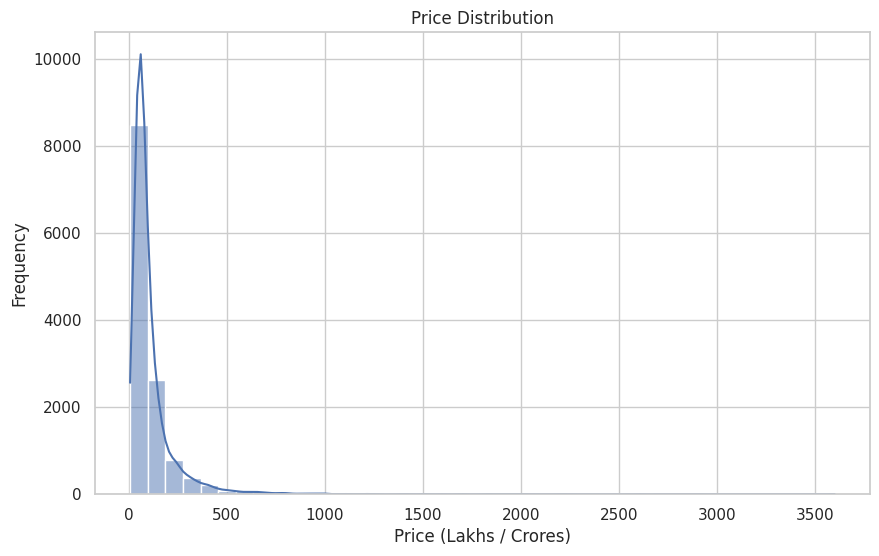

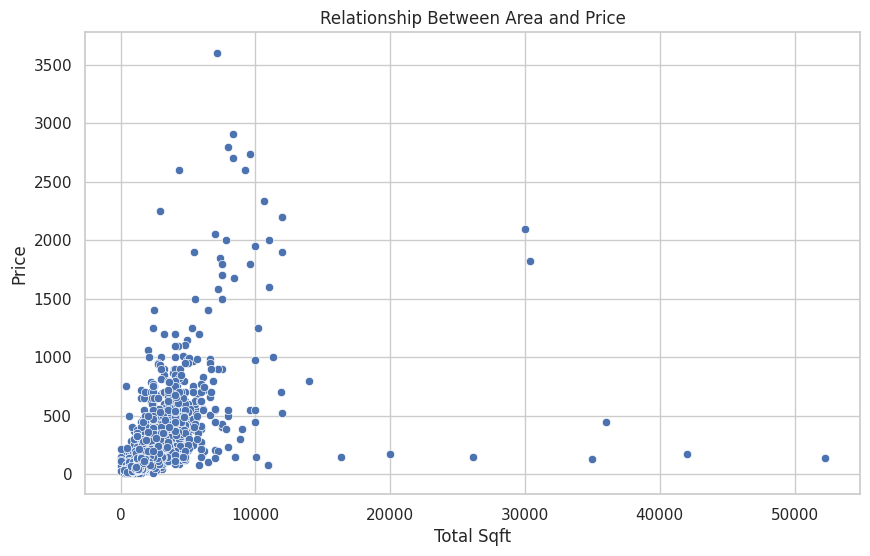

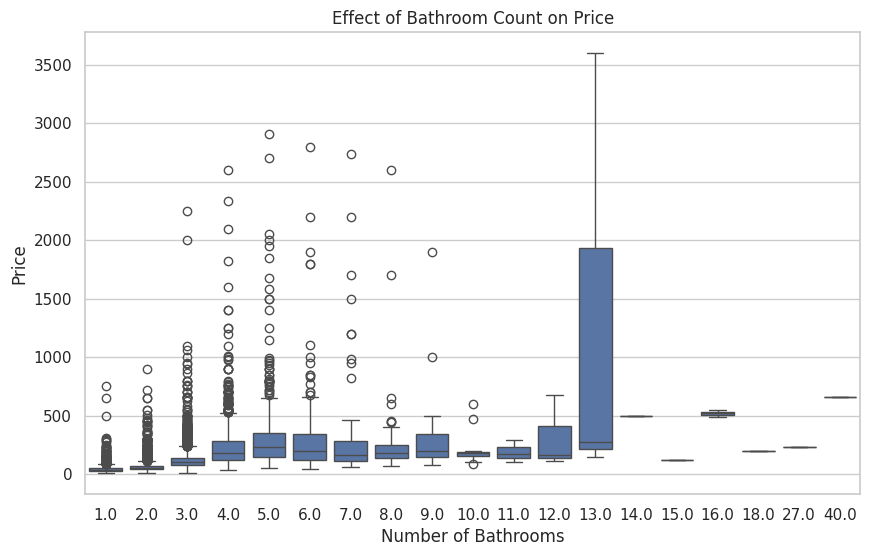

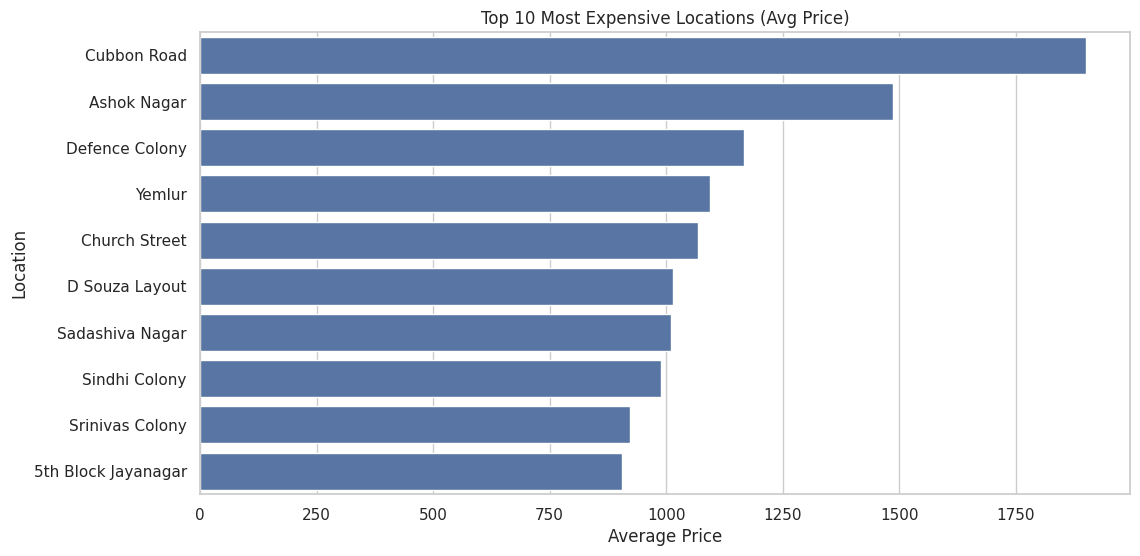

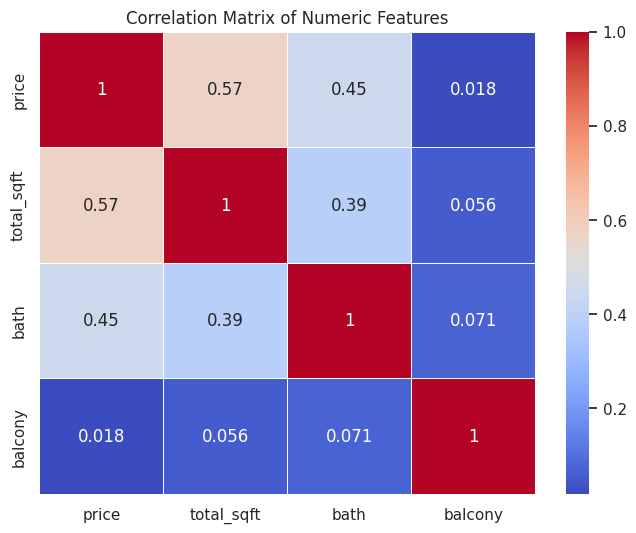

File uploaded to Google Drive → MyDrive


In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
drive.mount('/content/drive')
path='/content/drive/MyDrive/Bengaluru_House_Data.csv'
df=pd.read_csv(path)
print(df.head())
print(df.tail())
print(df.info())
print(df.shape)
print(df.describe())
print(df.info())
print(df.dtypes)
print(df.isnull())
print(df.isnull().sum())
new_df=df.dropna()
df.drop(['society'],axis=1)
df['bath'].fillna(df['bath'].median(),inplace=True)
df['balcony'].fillna(0,inplace=True)
def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None
df['total_sqft']=df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()
df['location'].nunique()
average_price_by_location = df.groupby('location')['price'].mean().reset_index()
display(average_price_by_location.head())
highest_price_location = average_price_by_location.sort_values(by='price', ascending=False).iloc[0]
display(highest_price_location)
corr = df[['total_sqft', 'bath', 'price']].corr()
display(corr)
corr_sqft_price = corr.loc['total_sqft', 'price']
print("\n5) Interpretation:")

if corr_sqft_price > 0.7:
    print("• Strong positive correlation → Larger houses generally have higher prices.")
elif corr_sqft_price > 0.4:
    print("• Moderate correlation → Larger houses often cost more, but not always.")
else:
    print("• Weak correlation → Size alone does NOT determine price.")
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, bins=40)
plt.title("Price Distribution")
plt.xlabel("Price (Lakhs / Crores)")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='total_sqft', y='price')
plt.title("Relationship Between Area and Price")
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='bath', y='price')
plt.title("Effect of Bathroom Count on Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.show()
top10 = df.groupby("location")["price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Most Expensive Locations (Avg Price)")
plt.xlabel("Average Price")
plt.ylabel("Location")
plt.show()
numeric_cols = ['price', 'total_sqft', 'bath', 'balcony']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()
df.to_csv('/content/drive/MyDrive/cleaned_house_price_data.csv', index=False)
print("File uploaded to Google Drive → MyDrive")

